# Spotify Most Streamed Songs

This notebook is created to analyse data from spotify, the data is obtained from here: https://www.kaggle.com/datasets/abdulszz/spotify-most-streamed-songs?resource=download 

The goal of this model will be to predict the number of plays a song will get within Spotify. 



In [653]:
print("Welcome to First Assignment of INSY-695!")

Welcome to First Assignment of INSY-695!


This project requires Python 3.7 or above:

In [654]:
import sys

assert sys.version_info >= (3, 7)

In [655]:
import sklearn

# Get the Data

## Download the Data

In [656]:
import pandas as pd

# Specify the path to your CSV file
file_path = "Spotify Most Streamed Songs.csv"

# Load the CSV file into a Pandas DataFrame
try:
    musique_df = pd.read_csv(file_path)
    print("DataFrame loaded successfully!")
    print(musique_df.head())  # Display the first few rows of the DataFrame
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")



DataFrame loaded successfully!
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  key   mode  \
0                14

## Quick look at Data Structure

In [657]:
musique_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [658]:
musique_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [659]:
musique_df.describe()
musique_df.columns = musique_df.columns.str.strip()  # Remove leading/trailing spaces from column names


The following cell creates the `images/end_to_end_project` folder (if it doesn't already exist), and it defines the `save_fig()` function which is used through this notebook to save the figures in high-res for the book.

In [660]:
# extra code – code to save the figures as high-res PNGs for the book
from pathlib import Path  # Import Path from pathlib

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

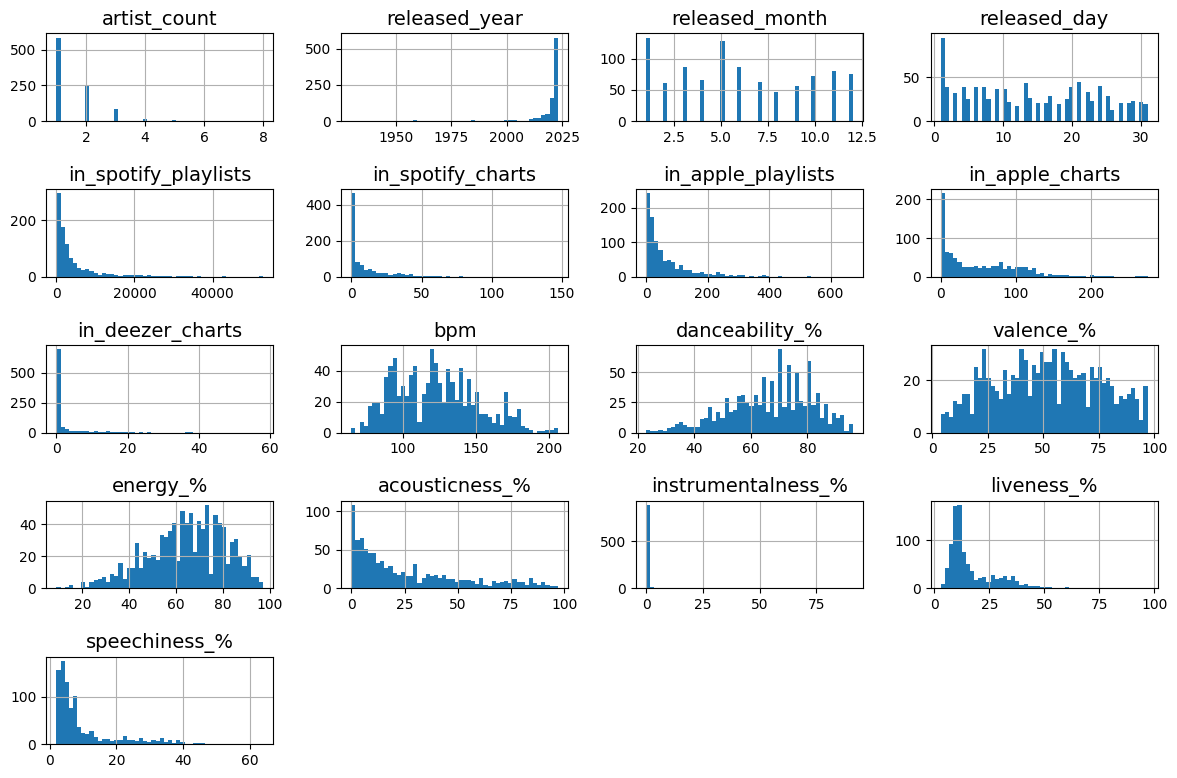

In [661]:
# extra code – the next 5 lines define the default font sizes
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

musique_df.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

## Create a Test Set

In [662]:
import numpy as np


def shuffle_and_split_data(data, test_ratio):
    """
    Shuffle the data and split it into a training set and a test set.

    Parameters:
    data (DataFrame): The dataset to be split.
    test_ratio (float): The proportion of the dataset to include in the test split.

    Returns:
    tuple: A tuple containing the training set and the test set as DataFrames.
    """

    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [663]:
train_set, test_set = shuffle_and_split_data(musique_df, 0.2)
len(train_set)

763

In [664]:
len(test_set)

190

In [665]:
np.random.seed(42)

In [666]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(musique_df, test_size=0.2, random_state=42)

In [667]:
test_set["released_year"].isnull().sum()

np.int64(0)

## Looking for Correlations

In [668]:
# Compute the correlation matrix
musique_df['streams'] = pd.to_numeric(musique_df['streams'], errors='coerce')

corr_matrix = musique_df.corr(numeric_only=True)

# Select only numeric columns
numeric_df = musique_df.select_dtypes(include=['number'])

print(numeric_df.columns)

# Remove leading/trailing spaces from column names
numeric_df.columns = numeric_df.columns.str.strip()

# Print the correlation for the 'streams' column
print(corr_matrix["streams"].sort_values(ascending=False))

Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'bpm',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')
streams                 1.000000
in_spotify_playlists    0.789822
in_apple_playlists      0.772063
in_apple_charts         0.320234
in_spotify_charts       0.245821
in_deezer_charts        0.228598
released_day            0.010598
bpm                    -0.002438
acousticness_%         -0.004485
released_month         -0.024938
energy_%               -0.026051
valence_%              -0.040831
instrumentalness_%     -0.044902
liveness_%             -0.048337
danceability_%         -0.105457
speechiness_%          -0.112333
artist_count           -0.136463
released_year          -0.230803
Name: streams, dtype: float64


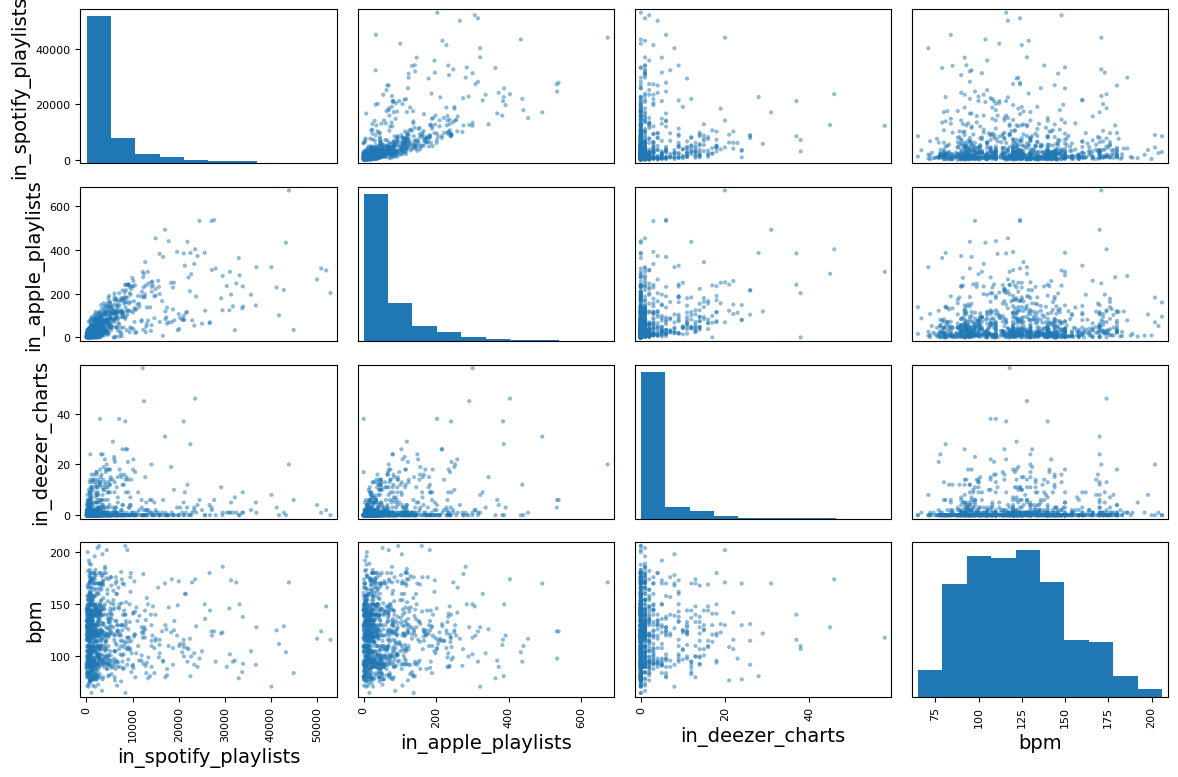

In [669]:
from pandas.plotting import scatter_matrix

attributes = [
    "in_spotify_playlists",
    "in_apple_playlists",
    "in_deezer_charts",
    "bpm",
]
scatter_matrix(musique_df[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

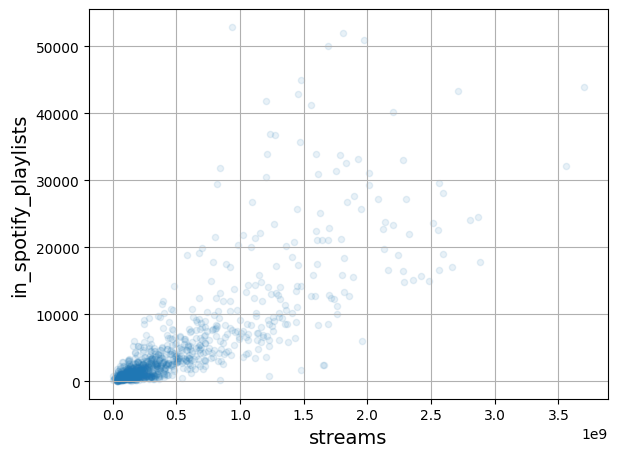

In [670]:
musique_df.plot(
    kind="scatter", x="streams", y="in_spotify_playlists", alpha=0.1, grid=True
)
save_fig("streams_vs_in_spotify_playlists")  # extra code
plt.show()

# Prepare the Data for Machine Learning Algorithms
## Data Cleaning

In [671]:
null_rows_idx = musique_df.isnull().any(axis=1)
musique_df.loc[null_rows_idx].head


<bound method NDFrame.head of                                             track_name  \
12                                             Flowers   
14                                           As It Was   
17   What Was I Made For? [From The Motion Picture ...   
22                                    I Wanna Be Yours   
35                                     Los del Espacio   
..                                                 ...   
901                                         After LIKE   
903              B.O.T.A. (Baddest Of Them All) - Edit   
927                I Really Want to Stay at Your House   
938                                          Labyrinth   
940                                      Sweet Nothing   

                                        artist(s)_name  artist_count  \
12                                         Miley Cyrus             1   
14                                        Harry Styles             1   
17                                       Billie Eilish   

In [672]:
from sklearn.preprocessing import LabelEncoder


df = musique_df.drop_duplicates()
df['streams'] = musique_df['streams'].fillna(musique_df['streams'].median())
df['cover_url'] = musique_df['cover_url'].fillna('Not Available')  # or remove rows

df['streams'] = pd.to_numeric(musique_df['streams'], errors='coerce')
df['artist_count'] = pd.to_numeric(musique_df['artist_count'], errors='coerce')


le = LabelEncoder()
df['key'] = le.fit_transform(musique_df['key'])
df['mode'] = le.fit_transform(musique_df['mode'])


df['track_name'] = musique_df['track_name'].str.strip()
df['artist(s)_name'] = musique_df['artist(s)_name'].str.strip()

df = musique_df.drop(columns=['cover_url', 'in_apple_playlists'])




## Removing Outliers
using IQR (Interquartile Range) we will remove some outliers from streams var

In [673]:
Q1 = df['streams'].quantile(0.25)
Q3 = df['streams'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['streams'] >= (Q1 - 1.5 * IQR)) & (df['streams'] <= (Q3 + 1.5 * IQR))]


## Handling Text and Categorical Attributes
Above all handling the categorical attributes for the name of the song and the artist.
In this case we will dummify both features

In [674]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['track_name', 'artist(s)_name', 'key', 'mode'], drop_first=True)


# Select and Train a Model

In this case as we will use Random Forest regression model given the diversity of the data (categorical and numerical features) and its ability to handle non-linear relationships.

## First model to use Random Forest 

In [675]:
# Scale the features
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

#Define the target (streams) and features
X = df_encoded.drop(columns=['streams'])  # Drop the target column and non-relevant columns
X = X.apply(lambda x: x.replace({',': ''}, regex=True).astype(float) if x.dtype == 'object' else x)

y = df_encoded['streams']

# Scale the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Train the Random Forest Model
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)


# Predictions and Evaluation
y_pred = rf_model.predict(X_test)




In [676]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 121592743.09056817
Mean Squared Error: 3.1446347303444572e+16
R² Score: 0.7593652043141899


## Using Cross Validation

In [677]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  

#print(y.value_counts()) 

# Perform cross-validation (5-fold cross-validation)
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')  # Use 'neg_mean_squared_error' for regression

# Print the cross-validation results
print("Cross-validation scores: ", cv_scores)
print("Average CV score: ", cv_scores.mean())


Cross-validation scores:  [-1.40374284e+08 -9.82238418e+07 -1.66291523e+08 -1.29579644e+08
 -9.37403282e+07]
Average CV score:  -125641924.14121194


## Plotting Feature importances

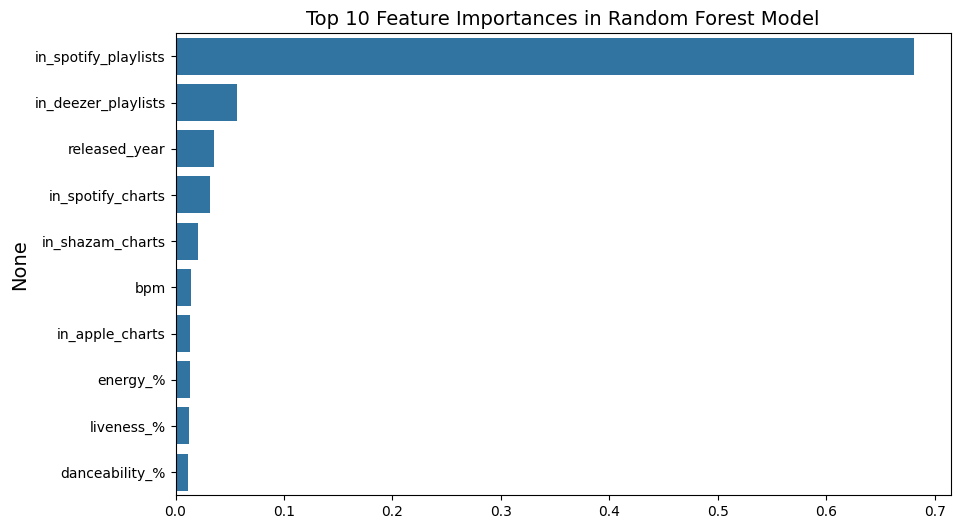

In [678]:
# Optional: Feature Importances
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top N important features
top_n = 10
indices_sorted = importances.argsort()[::-1][:top_n]  # Indices of the top N features
top_importances = importances[indices_sorted]
top_features = X.columns[indices_sorted]

# Plot the top N important features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_features)
plt.title(f'Top {top_n} Feature Importances in Random Forest Model')
plt.show()


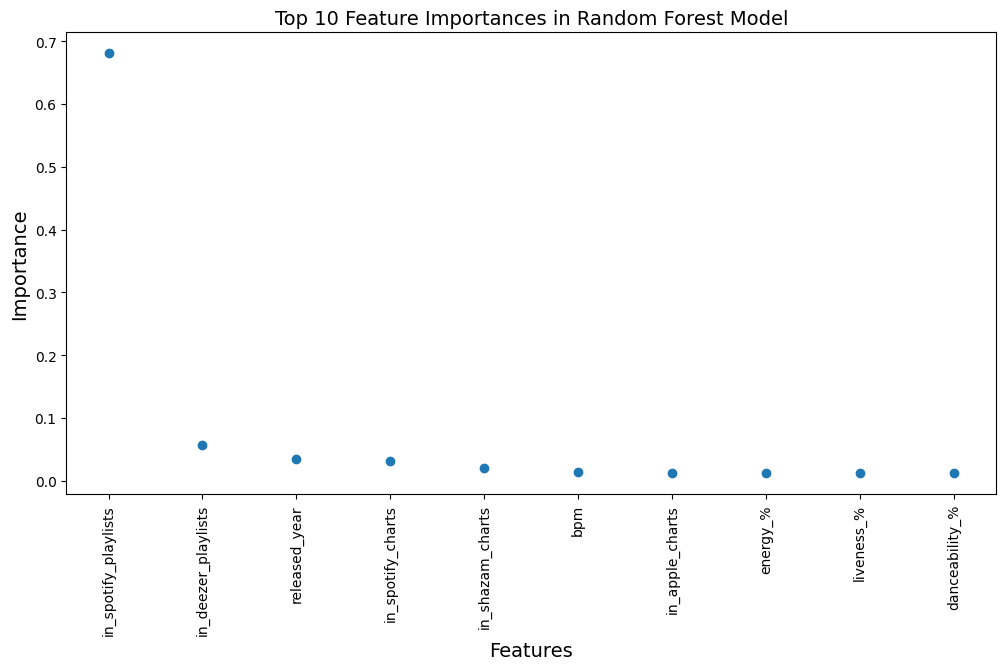

In [679]:
# Get the top 20 important features
top_10_indices = importances.argsort()[::-1][:10]  # Indices of the top 20 features
top_10_importances = importances[top_10_indices]
top_10_features = X.columns[top_10_indices]

# Scatter plot of the top 10 feature importances
plt.figure(figsize=(12, 6))
plt.scatter(top_10_features, top_10_importances)
plt.xticks(rotation=90)
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()




## Actual vs Predicted plot
To create a visualization of actual vs. predicted values for our Random Forest model, we can use the following plot:

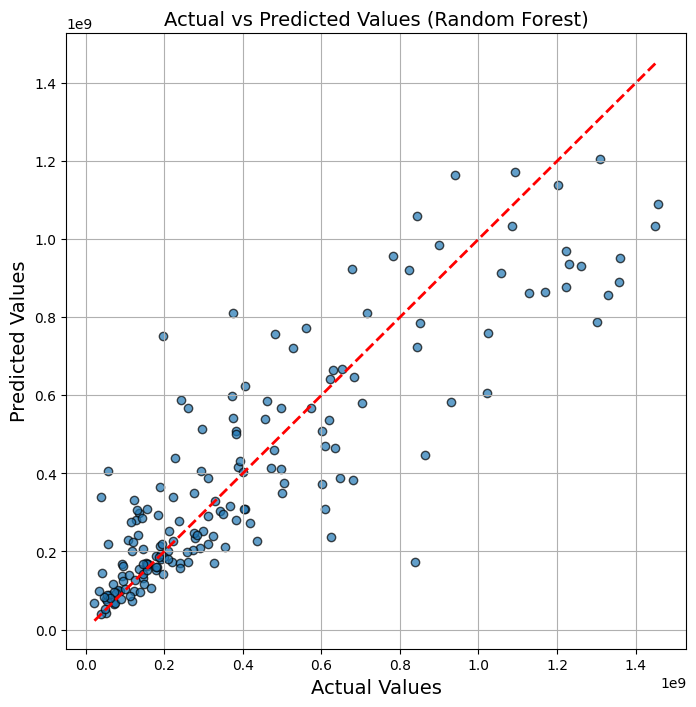

In [680]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Random Forest)")
plt.grid(True)
plt.show()


## Second model to use - Gradient Boosting

In [681]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Instantiate the model
gbr = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Predictions
y_pred = gbr.predict(X_test)




In [682]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Cross-validation
cv_scores = cross_val_score(gbr, X, y, cv=5, scoring='neg_mean_absolute_error')
print("Cross-validation scores:", cv_scores)
print("Average CV score:", -cv_scores.mean())

Mean Absolute Error: 125842304.48934942
Mean Squared Error: 3.229546118298624e+16
R² Score: 0.7528675865480999
Cross-validation scores: [-1.55995358e+08 -9.97854585e+07 -1.64135250e+08 -1.26635194e+08
 -9.35057546e+07]
Average CV score: 128011403.03515717


The results indicate that the model is performing moderately well based on the high 𝑅2 score (=0.75) but has significant errors as indicated by the Mean Absolute Error (MAE) and Mean Squared Error (MSE). The cross-validation (CV) scores are also quite large, reflecting high variability in model performance across folds.

## Feature importance 

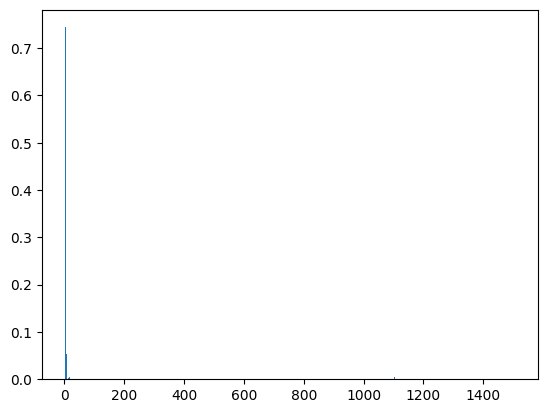

In [683]:
import matplotlib.pyplot as plt

feature_importances = gbr.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.show()


## Actual vs. Predicted Values Plot
This shows how close the predictions are to the actual values.

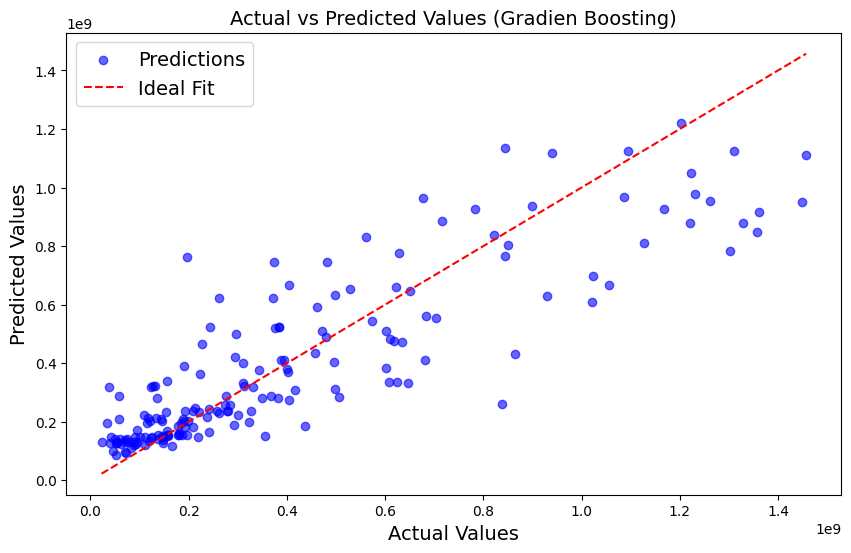

In [684]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Gradien Boosting)")
plt.legend()
plt.show()


## Third model to use - Support Vector Regressor (SVR)

In [685]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Support Vector Regressor
svr_model = SVR(kernel='rbf', C=2.0, epsilon=0.01)

# Train the model
svr_model.fit(X_train, y_train)

# Predictions
y_pred_svr = svr_model.predict(X_test)



In [686]:
# Evaluation metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_svr}")
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"R² Score: {r2_svr}")



Support Vector Regressor Performance:
Mean Absolute Error (MAE): 266459054.53617904
Mean Squared Error (MSE): 1.5349694401798074e+17
R² Score: -0.17459447374725978


## Actual vs. Predicted Values Plot
This shows how close the predictions are to the actual values.

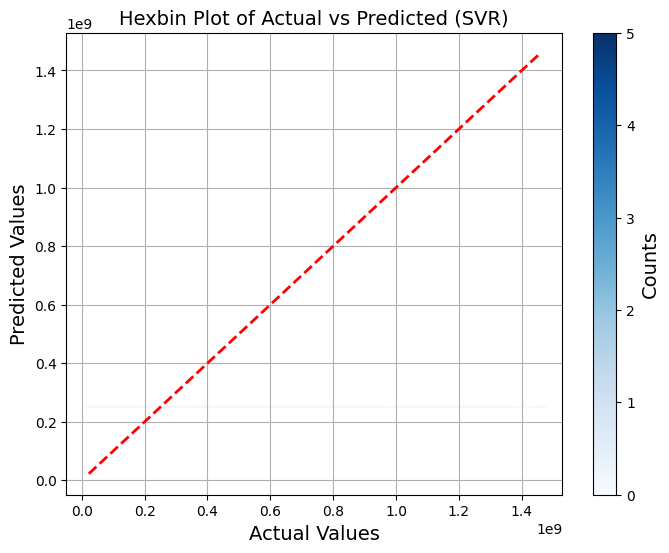

In [687]:
import matplotlib.pyplot as plt

# Hexbin plot for Support Vector Regressor with adjusted grid size
plt.figure(figsize=(8, 6))
hb = plt.hexbin(y_test, y_pred_svr, gridsize=50, cmap='Blues')
plt.colorbar(hb, label='Counts')  # Color bar for density
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Hexbin Plot of Actual vs Predicted (SVR)")
plt.grid(True)
plt.show()


## Comparing the three models chosen


In [688]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd



# List of models
models = {
    "Random Forest": rf_model,
    "Support Vector Regressor": svr_model,
    "Gradient Boosting Regressor": gbr  # Replace with the third model
}

# Dictionary to store results
results = {}

for model_name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    avg_cv_score = -np.mean(cv_scores)  # Negate to get positive MAE
    
    # Store results
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R²": r2,
        "Average CV MAE": avg_cv_score
    }

# Display results

results_df = pd.DataFrame(results).T
print(results_df)


                                      MAE           MSE        R²  \
Random Forest                1.217784e+08  3.165933e+16  0.757735   
Support Vector Regressor     2.664591e+08  1.534969e+17 -0.174594   
Gradient Boosting Regressor  1.258423e+08  3.229546e+16  0.752868   

                             Average CV MAE  
Random Forest                  1.246125e+08  
Support Vector Regressor       2.578962e+08  
Gradient Boosting Regressor    1.280114e+08  


## Results

The Random Forest model shows a good fit, with a relatively low MAE and MSE compared to the other models. The R² value of 0.76 indicates that the model explains 76% of the variance in the data, which is a strong performance. The average CV MAE is consistent with the test set MAE, suggesting that the model performs fairly well across different splits of the data.

The SVR model performs poorly in this case. The high MAE and MSE values indicate that the predictions are far from the true values. Additionally, the negative R² value (-0.17) suggests that the model does worse than a simple baseline model (e.g., predicting the mean of the target variable). This could be due to improper parameter tuning, scaling issues, or the model's sensitivity to noise in the data.

The GBR model shows a similar performance to Random Forest, with a relatively low MAE and MSE. The R² of 0.75 suggests that it explains 75% of the variance in the data, which is slightly lower than Random Forest. The average CV MAE is consistent with the test set MAE, indicating stable performance across different data splits.

Best Model: Random Forest performs the best in terms of R² and both MAE and MSE. The R² value of 0.76 indicates a good fit, and the MAE is lower compared to the other models.
Worst Model: Support Vector Regressor (SVR) performs the worst. The negative R² value and higher MAE/MSE suggest that this model is not suitable for this dataset without further tuning or data preprocessing.
Gradient Boosting Regressor is comparable to Random Forest in terms of MAE and MSE but slightly lags in R².

## Plotting the resuls

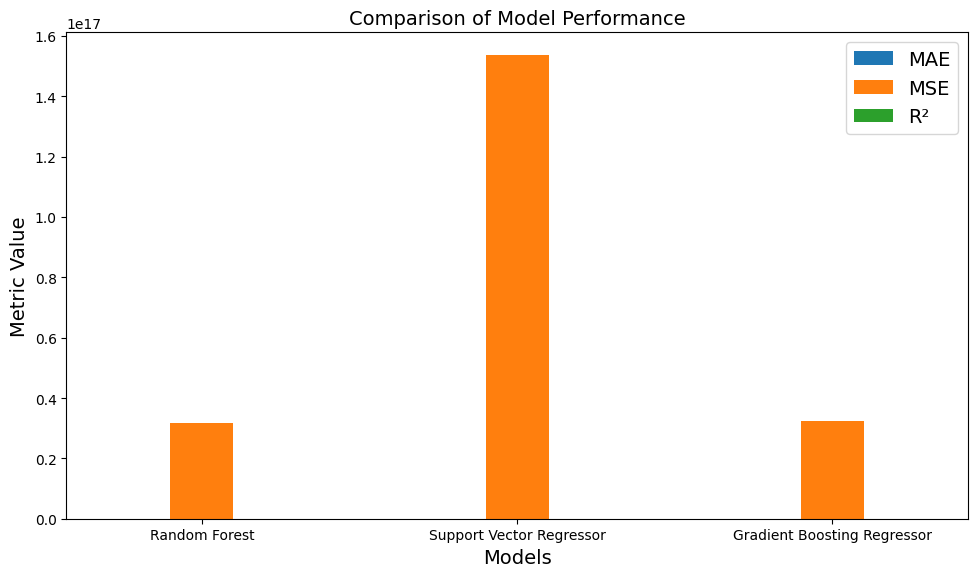

In [689]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
model_names = ['Random Forest', 'Support Vector Regressor', 'Gradient Boosting Regressor']
mae_values = [1.217784e+08, 2.664591e+08, 1.258423e+08]
mse_values = [3.165933e+16, 1.534969e+17, 3.229546e+16]
r2_values = [0.757735, -0.174594, 0.752868]

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.2
index = np.arange(len(model_names))

# Create bars for each metric
bar1 = ax.bar(index - bar_width, mae_values, bar_width, label='MAE')
bar2 = ax.bar(index, mse_values, bar_width, label='MSE')
bar3 = ax.bar(index + bar_width, r2_values, bar_width, label='R²')

# Labeling
ax.set_xlabel('Models')
ax.set_ylabel('Metric Value')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(index)
ax.set_xticklabels(model_names)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
